In [10]:
# Imported various libraries such as numpy, pandas & seaborn required for data analysis, cleaning, visualization and analyzing the 
# behaviour of various independent variables and their corelation /impact over dependent variable.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
# Reading the data file
mydataframe = pd.read_csv('diabetes.csv')

In [106]:
mydataframe['Outcome'].value_counts() 
# This dataset is skewed towards females who are non-diabetic. Hence this dataset shall not give correct predictions if we run our model
# to predict for ladies who are diabetic.

0    500
1    268
Name: Outcome, dtype: int64

In [107]:
mydataframe.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [79]:
# Analyzing the various columns and their data
mydataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


# BloodPressure,Insulin & SkinThickness have plenty of zero values. Therefore, it make sense to fill those zero's by taking out mean of the specific columns.

In [124]:
mydataframe['BloodPressure'].value_counts() # There are 35 values with 0 BP hence averaging out
mydataframe['BloodPressure']=mydataframe['BloodPressure'].replace(0,mydataframe['BloodPressure'].mean())
mydataframe['BloodPressure'].value_counts() # There are 35 values with 0 BP hence averaging out

70.000000     57
74.000000     52
68.000000     45
78.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
58.000000     21
86.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
92.000000      8
75.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
106.000000     3
100.000000     3
110.000000     3
98.000000      3
30.000000      2
108.000000     2
55.000000      2
46.000000      2
104.000000     2
102.000000     1
95.000000      1
61.000000      1
114.000000     1
24.000000      1
38.000000      1
40.000000      1
122.000000     1
Name: BloodPressure, dtype: int64

In [66]:
mydataframe['Insulin'].value_counts() # There are 374 values with 0 BP hence averaging out
mydataframe['Insulin']=mydataframe['Insulin'].replace(0,mydataframe['Insulin'].mean())
mydataframe['Insulin'].value_counts()

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
94.000000       7
180.000000      7
100.000000      7
135.000000      6
115.000000      6
110.000000      6
66.000000       5
76.000000       5
56.000000       5
49.000000       5
210.000000      5
160.000000      4
168.000000      4
64.000000       4
88.000000       4
125.000000      4
71.000000       4
90.000000       4
200.000000      4
54.000000       4
155.000000      4
165.000000      4
190.000000      4
92.000000       3
175.000000      3
             ... 
196.000000      1
81.000000       1
72.000000       1
84.000000       1
89.000000       1
43.000000       1
108.000000      1
73.000000       1
52.000000       1
68.000000       1
188.000000      1
166.000000      1
415.000000      1
600.000000      1
271.000000      1
545.000000      1
112.000000      1
16.000000       1
127.000000      1
178.000000      1
392.000000      1
22.000000       1
440.000000      1
46.000000       1
91.000000 

In [67]:
mydataframe['SkinThickness'].value_counts() # There are 40 values with 0 BP hence averaging out
mydataframe['SkinThickness']=mydataframe['SkinThickness'].replace(0,mydataframe['SkinThickness'].mean())
mydataframe['SkinThickness'].value_counts()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
18.000000     20
28.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
37.000000     16
25.000000     16
22.000000     16
26.000000     16
41.000000     15
35.000000     15
36.000000     14
17.000000     14
15.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
34.000000      8
46.000000      8
38.000000      7
12.000000      7
11.000000      6
14.000000      6
43.000000      6
16.000000      6
45.000000      6
10.000000      5
44.000000      5
47.000000      4
48.000000      4
50.000000      3
49.000000      3
7.000000       2
52.000000      2
8.000000       2
54.000000      2
51.000000      1
99.000000      1
60.000000      1
56.000000      1
63.000000      1
Name: SkinThickness, dtype: int64

In [81]:
mydataframe.info () # There are not any NULL Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B6B439898>,
      dtype=object)

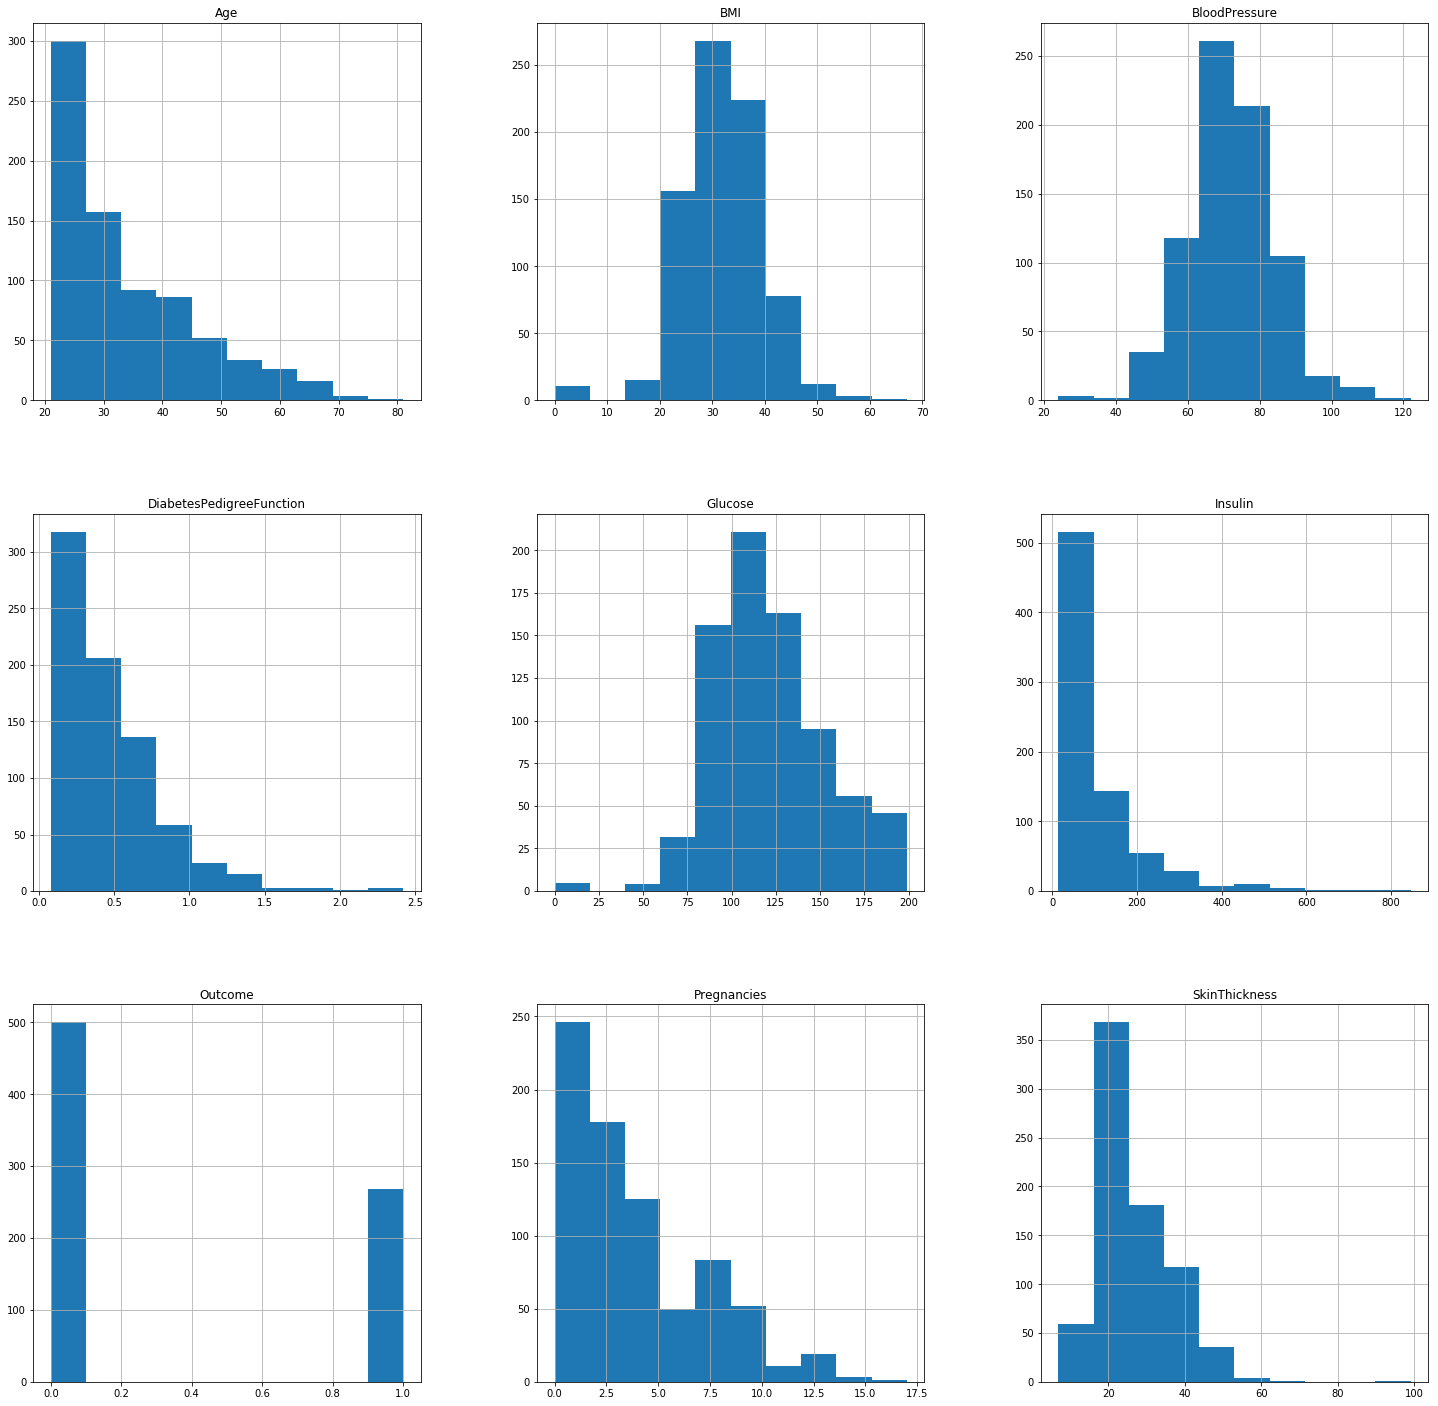

In [82]:
mydataframe.hist(figsize=(25,25))
# Age - Shows Right skewed distribution.That means majority of people are falling in age group of 20-30 
#and frequency reduces as the age grows.
# BMI - Shows very close to Normal distribution. BMI Index falls in average range.
#BloodPressure - Shows very close to Normal distribution. BP falls in average range with slight right skew.
# Insulin, pregnencies and skin thickness shows right skewed distribution

In [83]:
mydataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208984,0.013376,-0.018082,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.218579,0.145378,0.390835,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.208984,0.218579,1.000000,0.134155,0.010926,0.242656,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.145378,0.134155,1.000000,0.240361,0.501131,0.154961,0.026423,0.175026
Insulin,-0.018082,0.390835,0.010926,0.240361,1.000000,0.189337,0.157806,0.038652,0.179185
BMI,0.017683,0.221071,0.242656,0.501131,0.189337,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.000371,0.154961,0.157806,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.326740,0.026423,0.038652,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.162986,0.175026,0.179185,0.292695,0.173844,0.238356,1.000000


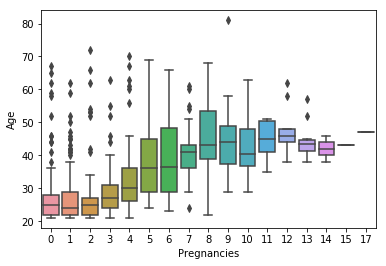

In [24]:
sns.boxplot(x="Pregnancies", y="Age", data=mydataframe)

In [128]:
pd.crosstab(mydataframe['Age'],mydataframe ['Outcome'])

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


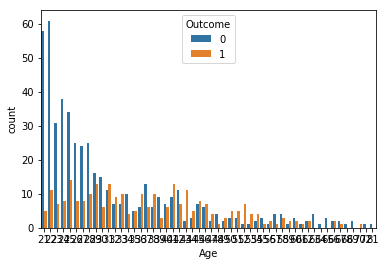

In [94]:
sns.countplot(x="Age",data=mydataframe , hue="Outcome")

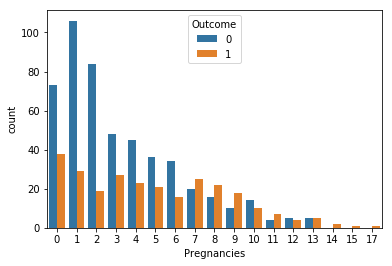

In [93]:
sns.countplot(x="Pregnancies",data=mydataframe , hue="Outcome")
# Highest number of diabetic patients have been found among those females who never had even single pregnency.Next to it,  females 
# who had pregnencies in range of 7-9.

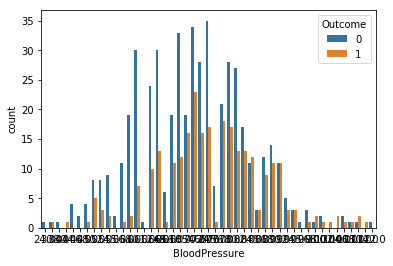

In [92]:
sns.countplot(x="BloodPressure",data=mydataframe , hue="Outcome")
# Females with very low BP & in range of 68-72 have higher occurences of diabetes

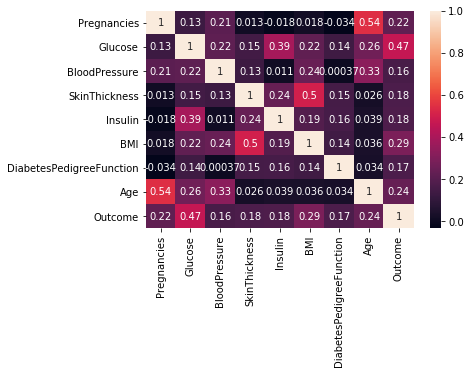

In [91]:
sns.heatmap(mydataframe.corr(),annot=True)
# Whether female is diabetic or not seem to be closely related (0.47) with Glucose.

In [14]:
# Age and Pregnancies , Glucose and Outcome are strongly correlated
# 60-90 BP have been noticed across all age group people

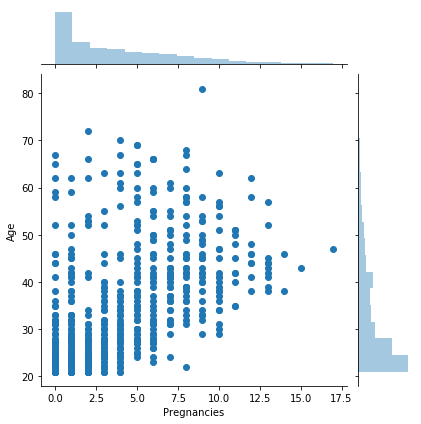

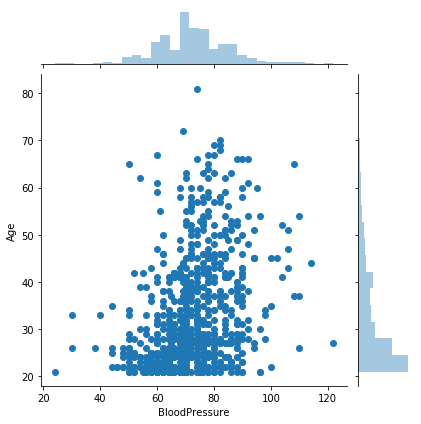

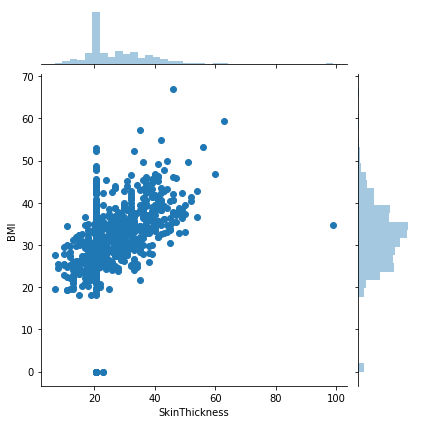

In [117]:
sns.jointplot(mydataframe['Pregnancies'], mydataframe['Age'])
sns.jointplot(mydataframe['BloodPressure'], mydataframe['Age']) # It shows strong correlation among Age & BP
sns.jointplot(mydataframe['SkinThickness'], mydataframe['BMI'])  # It shows strong correlation among Age & BP

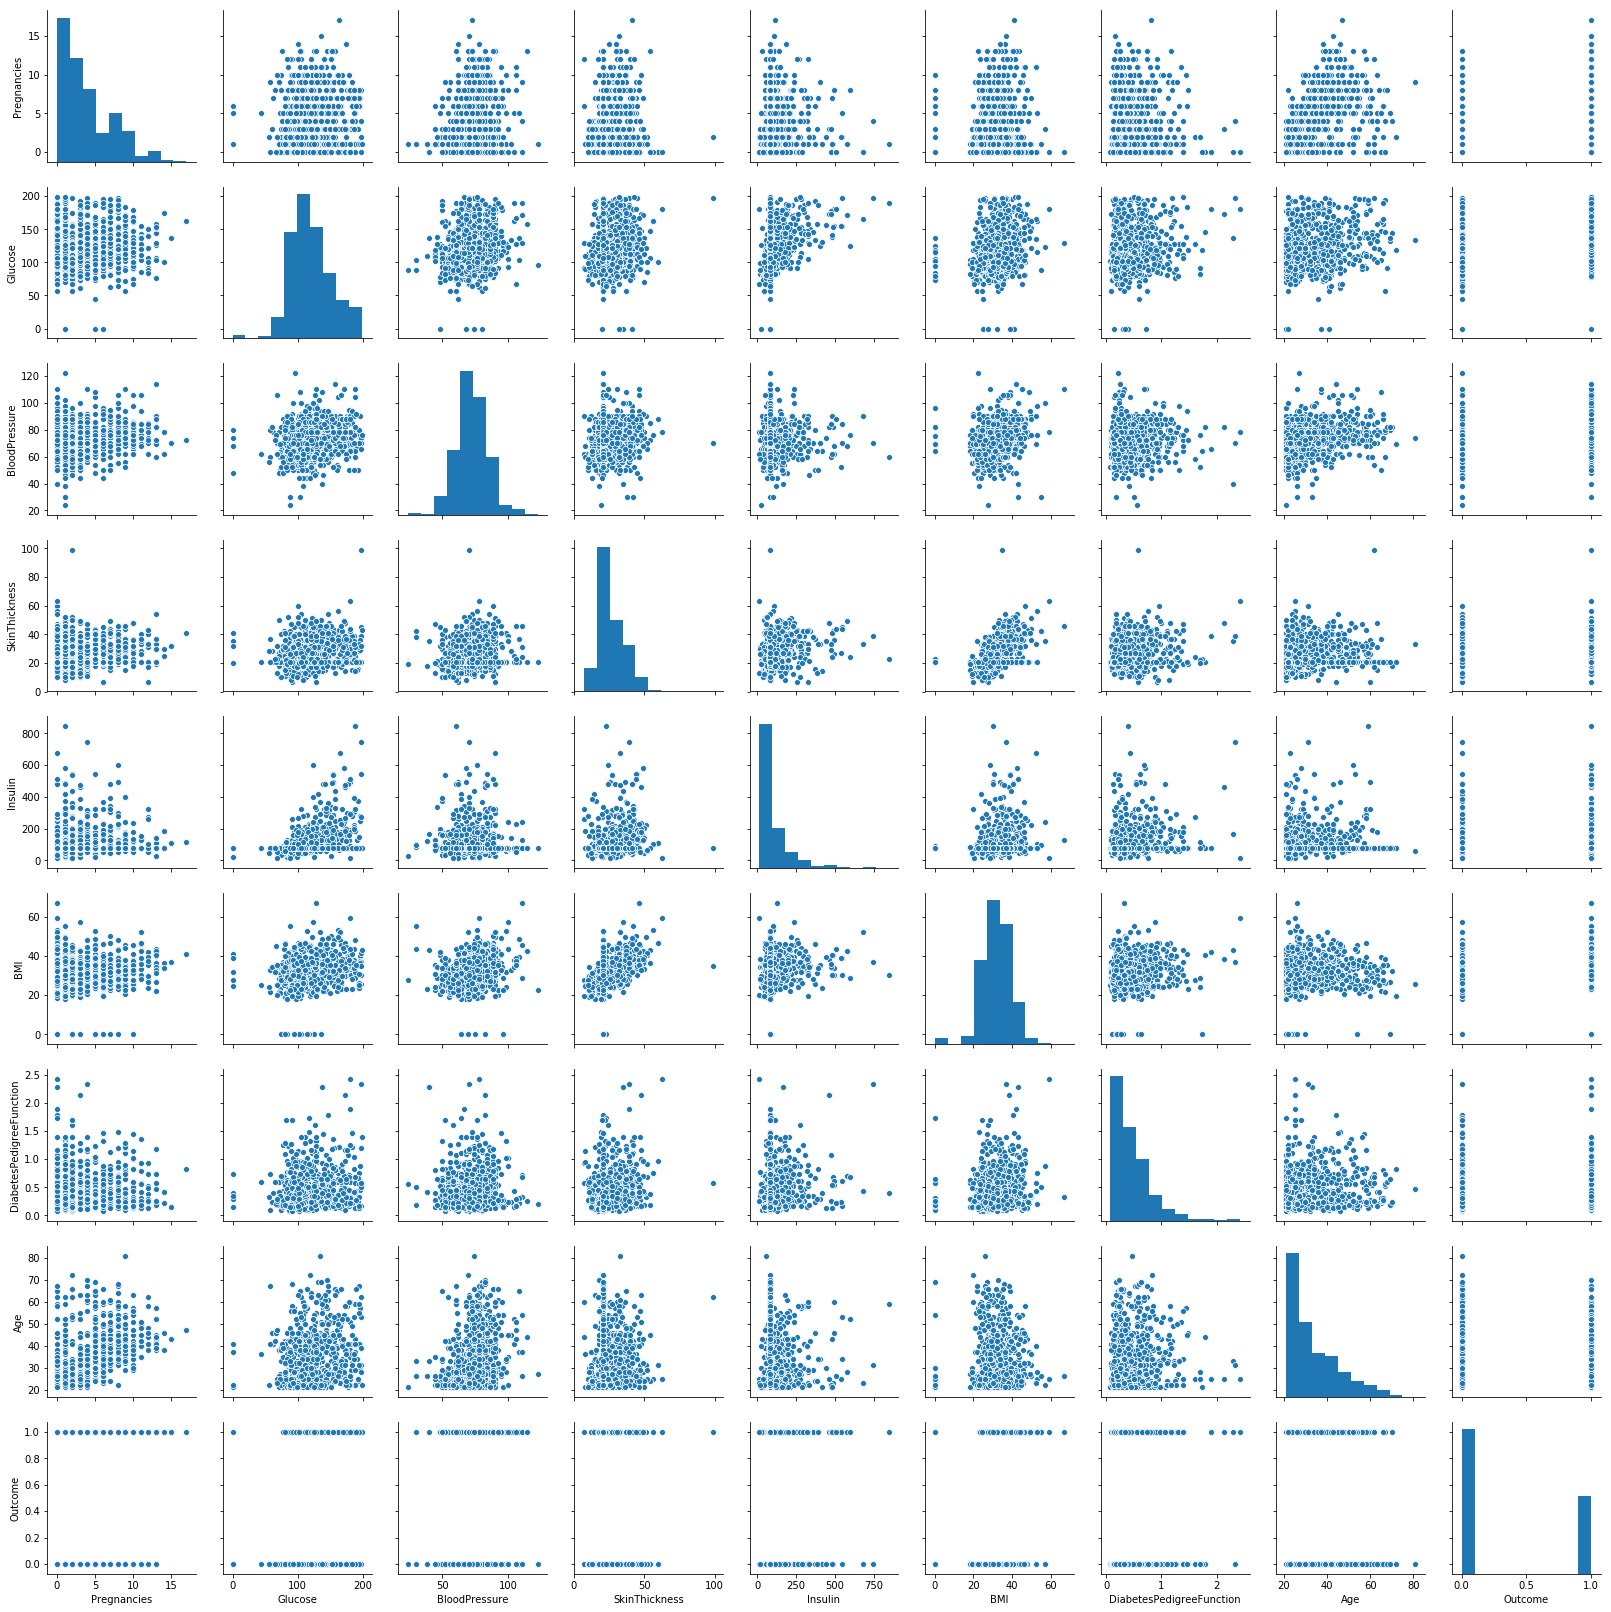

In [123]:
sns.pairplot(mydataframe[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']])

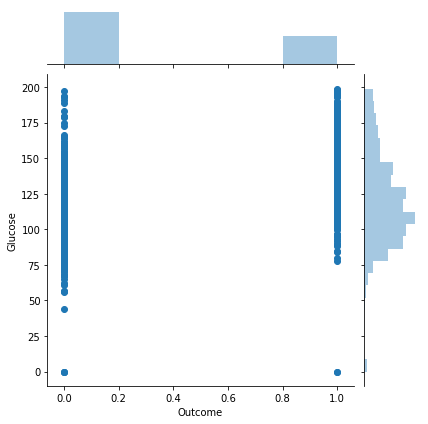

In [86]:
sns.jointplot(mydataframe['Outcome'], mydataframe['Glucose'])

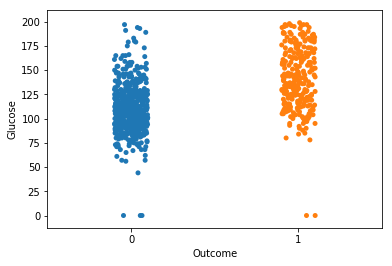

In [87]:
sns.stripplot(mydataframe['Outcome'], mydataframe['Glucose'], jitter=True)

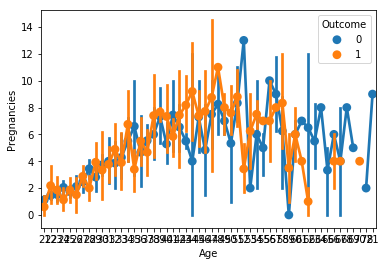

In [97]:
sns.pointplot(mydataframe['Age'], mydataframe['Pregnancies'], hue=mydataframe['Outcome'])
# Likelihood of Diabetes increases as the pregnencies increases with higher age group females 

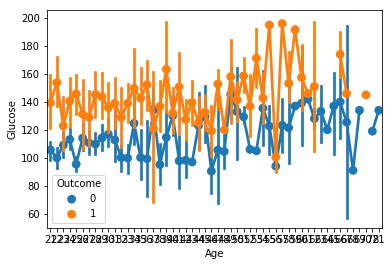

In [101]:
sns.pointplot(mydataframe['Age'], mydataframe['Glucose'], hue=mydataframe['Outcome'])
# Higher Diabetes seem to be found in people with higher Glucose content. However, No direct trend or relationship seen to be noticed
# between Glucose and Age.At Higher Age, Glucose content has slightly increased which has direct relation with occurences of diabetes

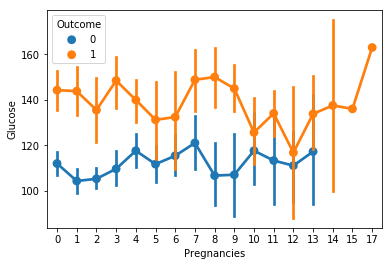

In [90]:
sns.pointplot(mydataframe['Pregnancies'], mydataframe['Glucose'], hue=mydataframe['Outcome'])
# This graph also shows that Diabetes is found in people who have higher glucose level. 

In [102]:
mydataframe.transpose()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Pregnancies,6.000000,1.000000,8.000000,1.000,0.000,5.000000,3.000,10.000000,2.000,8.000000,...,1.000000,6.000000,2.000,9.000000,9.000000,10.000,2.000000,5.000,1.000000,1.000000
Glucose,148.000000,85.000000,183.000000,89.000,137.000,116.000000,78.000,115.000000,197.000,125.000000,...,106.000000,190.000000,88.000,170.000000,89.000000,101.000,122.000000,121.000,126.000000,93.000000
BloodPressure,72.000000,66.000000,64.000000,66.000,40.000,74.000000,50.000,69.105469,70.000,96.000000,...,76.000000,92.000000,58.000,74.000000,62.000000,76.000,70.000000,72.000,60.000000,70.000000
SkinThickness,35.000000,29.000000,20.536458,23.000,35.000,20.536458,32.000,20.536458,45.000,20.536458,...,20.536458,20.536458,26.000,31.000000,20.536458,48.000,27.000000,23.000,20.536458,31.000000
Insulin,79.799479,79.799479,79.799479,94.000,168.000,79.799479,88.000,79.799479,543.000,79.799479,...,79.799479,79.799479,16.000,79.799479,79.799479,180.000,79.799479,112.000,79.799479,79.799479
BMI,33.600000,26.600000,23.300000,28.100,43.100,25.600000,31.000,35.300000,30.500,0.000000,...,37.500000,35.500000,28.400,44.000000,22.500000,32.900,36.800000,26.200,30.100000,30.400000
DiabetesPedigreeFunction,0.627000,0.351000,0.672000,0.167,2.288,0.201000,0.248,0.134000,0.158,0.232000,...,0.197000,0.278000,0.766,0.403000,0.142000,0.171,0.340000,0.245,0.349000,0.315000
Age,50.000000,31.000000,32.000000,21.000,33.000,30.000000,26.000,29.000000,53.000,54.000000,...,26.000000,66.000000,22.000,43.000000,33.000000,63.000,27.000000,30.000,47.000000,23.000000
Outcome,1.000000,0.000000,1.000000,0.000,1.000,0.000000,1.000,0.000000,1.000,1.000000,...,0.000000,1.000000,0.000,1.000000,0.000000,0.000,0.000000,0.000,1.000000,0.000000


In [121]:
mydataframe.describe().transpose()
# Insulin has higher standard deviation and hence it may not be good independent candidate to evaluate the effect over identifying diabetic patients.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.000000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.300000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B7FE60438>,
      dtype=object)

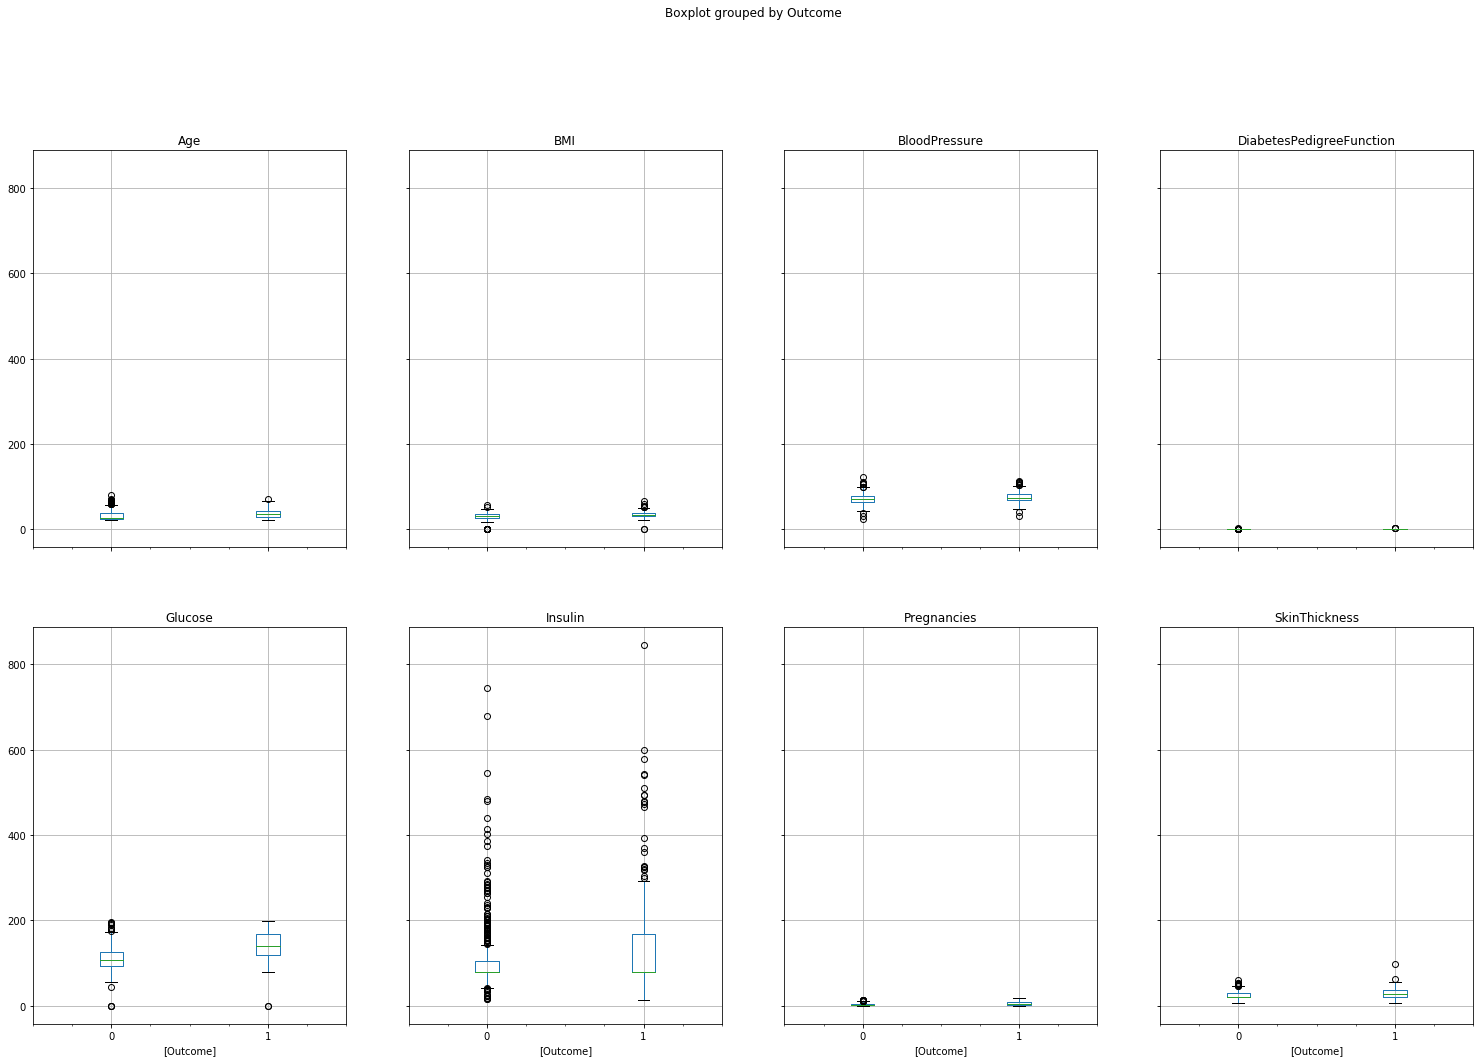

In [127]:
mydataframe.boxplot(by ='Outcome',  layout=(3,4), figsize=(25, 25))
# Insulin has highest number of data outliers adn therefore it has very high standard deviation.
# Hence we may conclude that it may not be good vriable to rely upon.

In [131]:
pd.crosstab(index=mydataframe['Age'],mydataframe ['Outcome'],margins=True)

SyntaxError: positional argument follows keyword argument (<ipython-input-131-11a369daa535>, line 1)

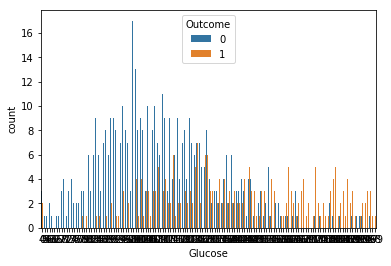

In [134]:
sns.countplot(x="Glucose", hue= "Outcome", data=mydataframe)
# People with higher glucose level have lesser count but are diebetic

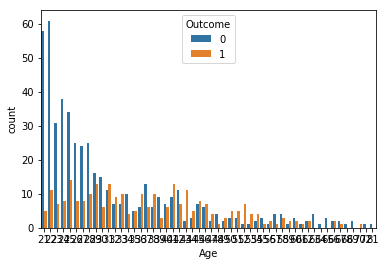

In [137]:
sns.countplot(x="Age", hue= "Outcome", data=mydataframe)
# People across the age group from 22 through 70 are found to be diabetic. Though not large in number unlike people those who are not diabetic.

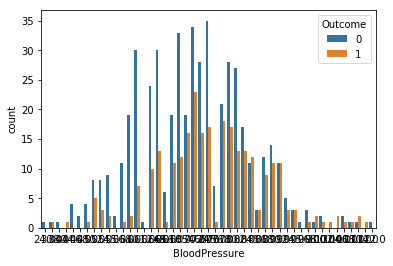

In [138]:
sns.countplot(x="BloodPressure", hue= "Outcome", data=mydataframe)
# People havng BP in range from 72 through 85 are found to be diabetic. Though not large in number unlike people those who are not diabetic.

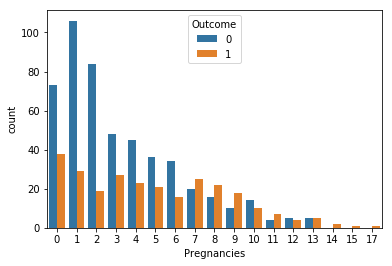

In [143]:
sns.countplot(x="Pregnancies", hue= "Outcome", data=mydataframe)
# People who never had even single pregnency are prone towards diabetes. Also, those who had pregnencies in range from 7-8 are also highly diabetic.
# However such numbers are not in large unlike people those who are not diabetic.

# Final Analysis - Dataset is skewed towards females who are non-diabetic. Hence this dataset shall not give correct predictions if we run our model to predict ladies who could get diabetes. Diabetes seem to be partially  correlated with Glucose.  That means, People with high glucose level shall eventually be diabetic. Similarly Age & Pregnencies seem to be somewhat strongly correlated with each other but doesn't have direct strong influence over diabetes outcome column. People who never had even single pregnency shall also become diabetic in future. Also, if people get pregnent in higher age group then they can be diaganosed with diabetes. People having BP in range of 72 through 85 can also become diabetic. No specific behaviour and influence of Age over diabetes has been seen. Reason being people across all age groups found to be diabetic. Insulin is not a good parameter to evauate diabetes because it has very high standard deviation